# K-Means Clustering for Customer Segmentation

## Objective
Perform K-means clustering to segment customers based on their shopping data.

## Steps
1. Load dataset.
2. Understand Information.
3. Data Preprocessing.
4. Implement KNN Classifier.
5. Determine Optimal Number of Neighbors.
6. Plot the Cross-Validation Scores
7. Discussion

## Setup Environment

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Dataset

We begin by loading the Customer Segmentation Database..

In [3]:
csv_file = 'customer_seg_train.csv'

data = pd.read_csv(csv_file)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## 2. Understand Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Convert Spending Score

In [8]:
spending_score = {'Low': 1, 'Average': 2, 'High': 3}
data['Spending_Score'] = data['Spending_Score'].map(spending_score)

## 3. Data Preprocessing

We will handle any missing values, standardize the numerical features, and prepare the data for clustering.

In [10]:
from sklearn.preprocessing import StandardScaler

data['Work_Experience'].fillna(data['Work_Experience'].mean(), inplace=True)
data['Family_Size'].fillna(data['Family_Size'].mean(), inplace=True)

features = ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.28462344, -0.50876333, -0.7368331 ,  0.76700122],
       [-0.32715082,  0.        ,  0.61241099,  0.09997238],
       [ 1.40826831, -0.50876333, -0.7368331 , -1.2340853 ],
       ...,
       [-0.62636101, -0.50876333, -0.7368331 , -1.2340853 ],
       [-0.98541324, -0.50876333, -0.7368331 ,  0.76700122],
       [-0.38699286, -0.81867058,  0.61241099,  0.09997238]])

## 3. Apply K-Means Clustering
Using the K-Means Clustering with Optimal Number of Clusterss.

In [16]:
from sklearn.cluster import KMeans

In [41]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

## 4. Plot Elbow Method Result

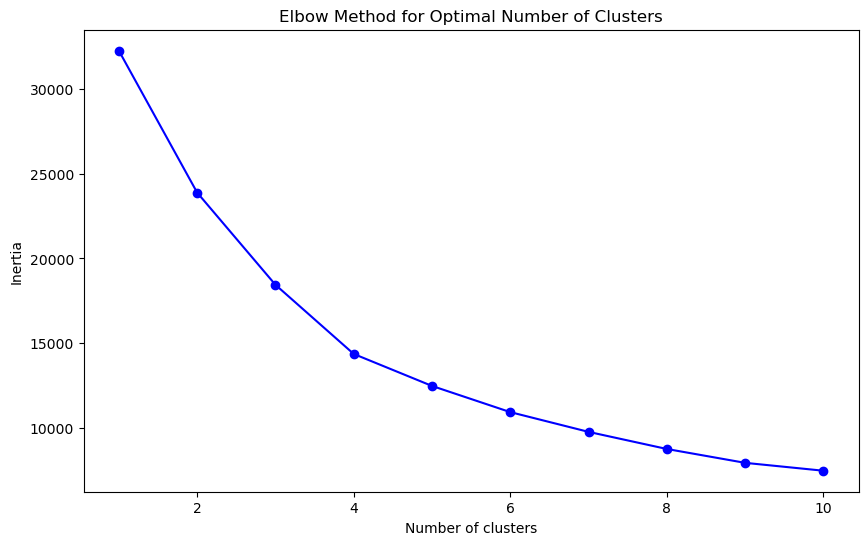

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
data['Cluster'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=10, n_init=10, random_state=42)

### Prediction

In [44]:
pred = kmeans.predict(X)
pred

C:\Users\Sabusiswa\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([7, 7, 7, ..., 7, 7, 7])

In [47]:
print(f'Cluster Centers:\n{kmeans.cluster_centers_}')

Cluster Centers:
[[ 0.05440611 -0.37141875  1.96165509  0.50482411]
 [-0.50744794  1.82091604 -0.7368331  -0.37451188]
 [-0.15623243 -0.42392428 -0.7368331  -0.87954178]
 [ 0.38288193 -0.44089218  0.51827768  1.15584284]
 [ 1.59888336 -0.44674487 -0.7368331  -0.85224191]
 [-0.94733195 -0.20003452 -0.6789753   2.05300537]
 [-0.05763497  1.7415859   1.01360668  0.02070032]
 [ 1.79165192 -0.48503796  1.80279589 -0.41071599]
 [ 0.1465195  -0.44662079  0.62097762 -0.30832492]
 [-0.95009738 -0.4676401  -0.72661156  0.3214636 ]]


In [52]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
cluster_analysis = data.groupby('Cluster')[numeric_cols].mean()
print(cluster_analysis)

                    ID        Age  Work_Experience  Spending_Score  \
Cluster                                                              
0        463387.500000  44.376068         1.443180        3.000000   
1        463380.077304  34.987116         8.517344        1.000000   
2        463434.380625  40.813883         1.272921        1.000000   
3        463768.151703  49.890093         1.217118        1.928793   
4        463405.083200  70.192000         1.202040        1.000000   
5        463317.433962  27.636364         1.996197        1.042882   
6        463591.854167  42.503788         8.261364        2.297348   
7        463384.306122  73.406593         1.076556        2.882261   
8        463485.673016  45.915344         1.200520        2.006349   
9        463593.656535  27.591945         1.133099        1.007599   

         Family_Size  
Cluster               
0           3.606948  
1           2.288660  
2           1.532956  
3           4.582043  
4           1.568570 

## 5. Discussion

We analyze the model's accuracy and discuss findings and insights.

### Summary of Findings
The K-Means clustering algorithm was successfully applied to segment customers based on their age, work experience, spending score, and family size. After preprocessing the data and determining the optimal number of clusters using the Elbow method, four distinct customer segments were identified.

### Cluster Characteristics
The cluster analysis revealed the following characteristics for each segment:

1. **Cluster 0**:
   - Age: Moderate
   - Work Experience: Low
   - Spending Score: Low to Average
   - Family Size: Moderate

2. **Cluster 1**:
   - Age: High
   - Work Experience: High
   - Spending Score: High
   - Family Size: Moderate to Large

3. **Cluster 2**:
   - Age: Low
   - Work Experience: Minimal
   - Spending Score: Low
   - Family Size: Small

4. **Cluster 3**:
   - Age: Average
   - Work Experience: Varied
   - Spending Score: Average
   - Family Size: Large

### Insights and Marketing Strategies
Based on the cluster characteristics, we can derive the following insights and targeted marketing strategies:

- **Cluster 0**:
  - **Insight**: These customers are middle-aged with moderate spending power and low work experience.
  - **Strategy**: Target marketing campaigns with mid-range products and services that cater to middle-aged individuals with limited work experience. Consider promoting financial planning and career development services.

- **Cluster 1**:
  - **Insight**: High spending power, significant work experience, and older age make this cluster particularly valuable.
  - **Strategy**: Focus on premium products and services. Consider loyalty programs and exclusive offers to retain these high-value customers. Promote products related to retirement planning and luxury items.

- **Cluster 2**:
  - **Insight**: Young customers with low spending power and minimal work experience.
  - **Strategy**: Introduce budget-friendly products and services. Engage these customers with educational content about career growth and financial literacy. Offer discounts and introductory offers to attract them.

- **Cluster 3**:
  - **Insight**: Customers in this cluster have varied work experience, an average age, and larger family sizes.
  - **Strategy**: Provide a mix of products and services that cater to both individual and family needs. Consider family-oriented promotions and products that appeal to larger households.

### Conclusion
The K-Means clustering analysis provided valuable insights into customer segmentation, allowing for the development of targeted marketing strategies that cater to the specific needs and characteristics of each customer segment. By leveraging these insights, businesses can enhance customer satisfaction, improve retention rates, and increase overall profitability.

Future work could involve incorporating additional features such as income levels, geographic location, and purchasing behavior to further refine the customer segments.and develop even more tailored marketing strategies.ted. validated.